<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Machine Learning Course</font></span>
        <span><br><font size=3>Spring 2023</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=5>Hands-On 4</font><br>
        <hr />
        <font size=3>Alireza Ghafouri</font><br>
        <font size=3><b><a href="mailto:alirezaghafouri@ut.ac.ir">alirezaghafouri@ut.ac.ir</a></b><br></font><br>

</div>

## Table of Contents
* [1. Introduction to Neural Networks](#1)
    * [Perceptron](#1.1)
        * [Activation Functions](#1.1.1)
        * [Formulas Review](#1.1.2)
        * [Hands-On](#1.1.3)
    * [Multi-layer Perceptron](#1.2)
        * [Overview](#1.2.1)
        * [Conclusion](#1.2.2)
        * [Hands-On](#1.2.3)
            * [MLP Classifier](#1.2.3.1)
            * [Architecture & accessing params](#1.2.3.2)
        * [Tensorflow Playground](#1.2.4)
        
        
* [2. Introduction to CNNs](#2)
    * [Components](#2.1)
        * [Input layer](#2.1.1)
        * [Convolution Layer](#2.1.2)
        * [Pooling Layer](#2.1.3)
        * [Fully Connected Layer](#2.1.4)
    * [Hands-On](#2.2)
    
    
* [3. Decision Tree](#3)
    * [Intro](#3.1)
    * [Idea](#3.2)
    * [Attribute Selection Measures](#3.3)
        * [ Information Gain](#3.3.1)
        * [Gain Ratio](#3.3.2)
        * [Gini index](#3.3.3)    
    * [Hands-On](#3.4)
    * [Pros & Cons](#3.5)

<a id=1></a>

<hr>
<hr>
<hr>

# 1. Introduction to Neural Networks

To give a high overview of what neural networks are, we will look at a Perceptron, and how we can extend that to make Multi-Layer Perceptrons, a simple case of neural networks.

<a id=1.1></a>

## Perceptron

A perceptron is very similar to what we saw in logistic regression. It is a linear combination of all the features that pass through an activation function:

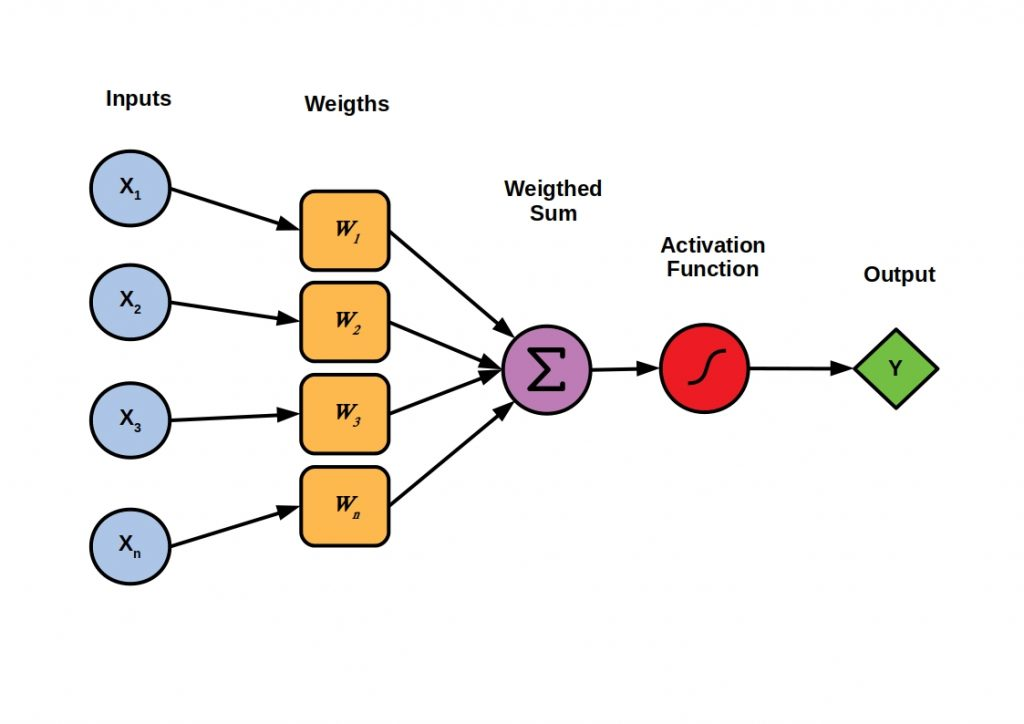

<a id=1.1.1></a>

**Some of the possible Activation functions:**

The choice of activation function depends on what we wanna do. For example, do we want probabilities? Are we doing classification or regression? How many classes do we have in our data?

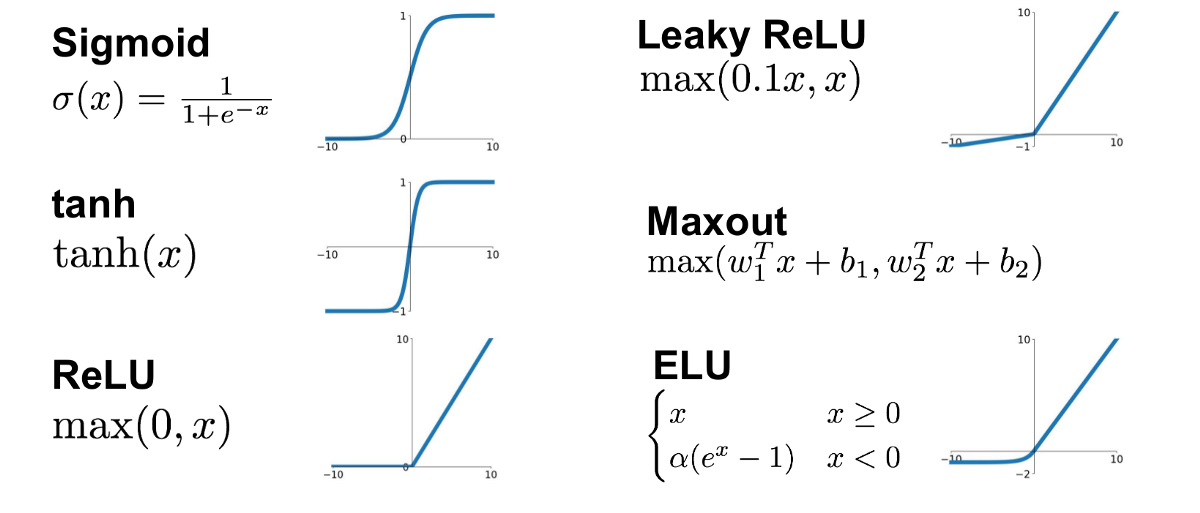

<a id=1.1.2></a>

**Remind Formulas:**
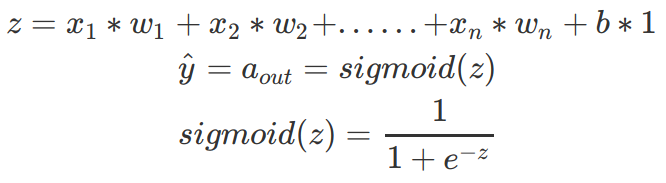


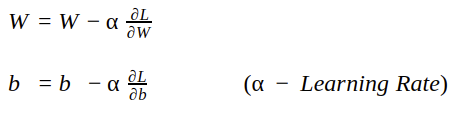

<a id=1.1.3></a>

<hr>

### Perceptron Hands-On

**Implementation of “inclusive or” By Hand** 

 Reminder:
 
 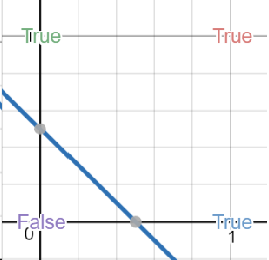
 
* if A is true and B is true, then A OR B is true
* if A is true and B is false, then A OR B is true.
* if A is false and B is true, then A OR B is true.
* if A is false and B is false, then A OR B is false

In [21]:
import numpy, random, os
lr = 1 #learning rate
bias = 1 #value of bias
Weights = [random.random(),random.random(),random.random()] #weights generated in a list (3 weights in total for 2 neurons and the bias)

In [22]:
def Perceptron(input1, input2, output) :
    score = input1*Weights[0]+input2*Weights[1]+bias*Weights[2]
    if score > 0 : #activation function (here Heaviside)
        outputP = 1
    else:
        outputP = 0
    error = output - outputP
    Weights[0] += error * input1 * lr
    Weights[1] += error * input2 * lr
    Weights[2] += error * bias * lr

##### Learning Phase:

In [23]:
for i in range(50) :
    Perceptron(1,1,1) #True OR true
    Perceptron(1,0,1) #True OR false
    Perceptron(0,1,1) #False OR true
    Perceptron(0,0,0) #False OR false

##### Testing Phase:

In [28]:
x = int(input())
y = int(input())
score = x*Weights[0] + y*Weights[1] + bias*Weights[2]
if score > 0 : #activation function
    outputP = 1
else :
    outputP = 0
print(x, "OR", y, "is : ", outputP)

-2
-4
-2 OR -4 is :  0


<a id=1.2></a>


## Multi-layer Perceptron

<a id=1.2.1></a>

### Overview

We can combine perceptrons to learn complex non-linear functions:

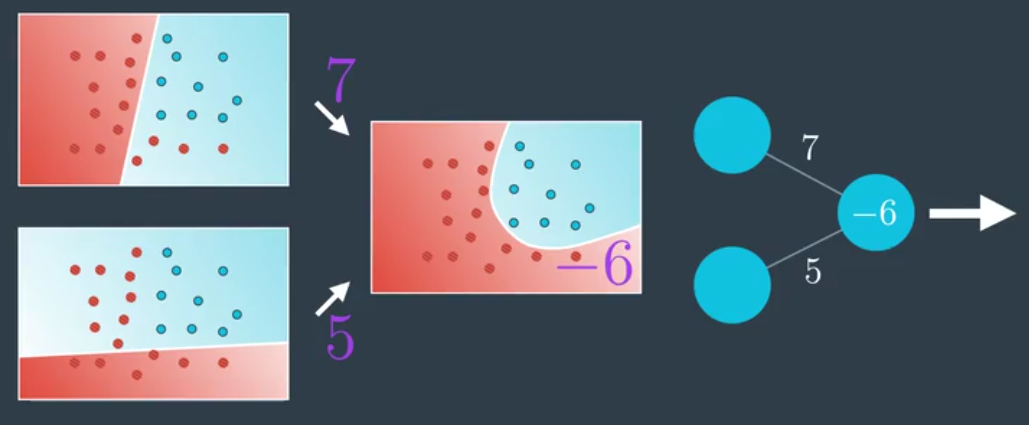

**Related Example:**

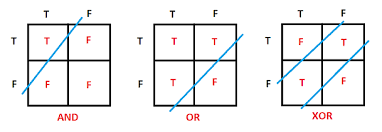

We call this a multi-layer perceptron. MLPs are a special case of Neural Networks. 

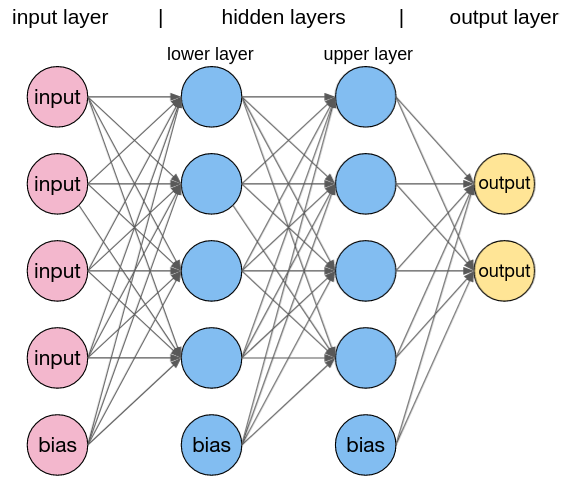

A neural network can learn complex relationships and patterns in the data and be used for many machine learning tasks.
<br> In fact, Machine Learning is dominated by neural networks. They're everywhere nowadays. Deep neural networks are simply neural networks with many hidden layers.

<a id=1.2.2></a>

## Conclusion

**Pros:**

- Unbelievably high performance
- Beyond Classification & Regression
- No need to think, the model thinks for you!

**Cons:**

- Not interpretable
- Data hungry
- Training is long


**Types of neural networks:**

* Convolutional neural networks (CNNs)
* Recurrent neural networks
* Autoencoders
* Feed-Forward neural networks

**Applications:**

- Everywhere! Especially when we have a lot of data

<a id=1.2.3></a>

<hr>

### Multi-layer Perceptron Hands-On

<a id=1.2.3.1></a>

#### part 1 : MLPClassifier (Multilabel Example)

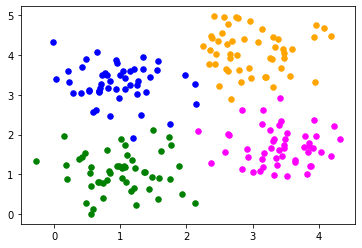

In [29]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 200
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
data, labels = make_blobs(n_samples=n_samples, 
                          centers=blob_centers, 
                          cluster_std=0.5,
                          random_state=0)


colours = ('green', 'orange', "blue", "magenta")
fig, ax = plt.subplots()

for n_class in range(len(blob_centers)):
    ax.scatter(data[labels==n_class][:, 0], 
               data[labels==n_class][:, 1], 
               c=colours[n_class], 
               s=30, 
               label=str(n_class))

In [30]:
from sklearn.model_selection import train_test_split
datasets = train_test_split(data, 
                            labels,
                            test_size=0.2)

train_data, test_data, train_labels, test_labels = datasets

In [31]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(6,), 
                    random_state=1)

clf.fit(train_data, train_labels) 

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6,), random_state=1,
              solver='lbfgs')

In [32]:
from sklearn.metrics import accuracy_score

predictions_train = clf.predict(train_data)
predictions_test = clf.predict(test_data)
train_score = accuracy_score(predictions_train, train_labels)
print("score on train data: ", train_score)
test_score = accuracy_score(predictions_test, test_labels)
print("score on test data: ", test_score)

score on train data:  1.0
score on test data:  0.95


In [33]:
predictions_train[:20]

array([3, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 3, 1, 3, 0, 3, 3, 0, 0, 3])

<a id=1.2.3.2></a>

##### part 2: Architecture & accessing params

In [34]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]
y = [0, 0, 0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

print(clf.fit(X, y))

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')


**Let's take a look at the network architecture**
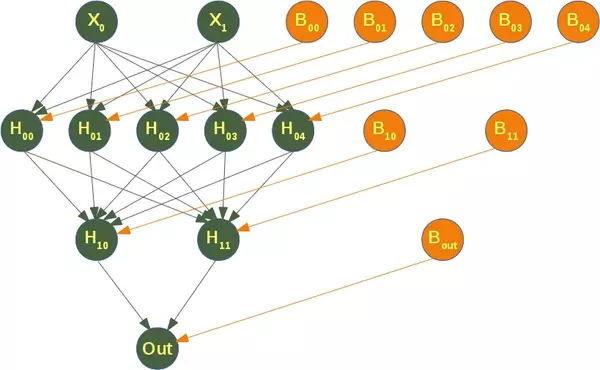


In [35]:
# The attribute coefs_ contains a list of weight matrices for every layer. 
# The weight matrix at index i holds the weights between the layer i and layer i + 1

print("weights between input and first hidden layer:")
print(clf.coefs_[0])
print("\nweights between first hidden and second hidden layer:")
print(clf.coefs_[1])

weights between input and first hidden layer:
[[-0.14203691 -1.18304359 -0.85567518 -4.53250719 -0.60466275]
 [-0.69781111 -3.5850093  -0.26436018 -4.39161248  0.06644423]]

weights between first hidden and second hidden layer:
[[ 0.29179638 -0.14155284]
 [ 4.02666592 -0.61556475]
 [-0.51677234  0.51479708]
 [ 7.37215202 -0.31936965]
 [ 0.32920668  0.64428109]]


In [36]:
# The weight vector of H00 can be accessed with:
clf.coefs_[0][:,0]

array([-0.14203691, -0.69781111])

In [37]:
print("w0 = ", clf.coefs_[0][0][0])
print("w1 = ", clf.coefs_[0][1][0])

w0 =  -0.14203691267827173
w1 =  -0.6978111149778692


In [38]:
# We can generalize the above to access a neuron Hij

for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.14203691 -0.69781111], 
0 1 [-1.18304359 -3.5850093 ], 
0 2 [-0.85567518 -0.26436018], 
0 3 [-4.53250719 -4.39161248], 
0 4 [-0.60466275  0.06644423], 

1 0 [ 0.29179638  4.02666592 -0.51677234  7.37215202  0.32920668], 
1 1 [-0.14155284 -0.61556475  0.51479708 -0.31936965  0.64428109], 

2 0 [-4.96774269 -0.86330397], 



In [39]:
# intercepts_ is a list of bias vectors, where the vector at index i represents the bias values added to layer i+1.

print("Bias values for first hidden layer:")
print(clf.intercepts_[0])
print("\nBias values for second hidden layer:")
print(clf.intercepts_[1])

Bias values for first hidden layer:
[-0.14962269 -0.59232707 -0.5472481   7.02667699 -0.87510813]

Bias values for second hidden layer:
[-3.61417672 -0.76834882]


In [40]:
# Prediction 
# class0 or class1? 
result = clf.predict([[0, 0], [0, 1], 
                      [1, 0], [0, 1], 
                      [1, 1], [2., 2.],
                      [1.3, 1.3], [2, 4.8]])
result

array([0, 0, 0, 0, 1, 1, 1, 1])

In [41]:
# get the probability estimates
prob_results = clf.predict_proba([[0, 0], [0, 1], 
                                  [1, 0], [0, 1], 
                                  [1, 1], [2., 2.], 
                                  [1.3, 1.3], [2, 4.8]])
print(prob_results)

[[1.00000000e+000 5.25723951e-101]
 [1.00000000e+000 3.71534882e-031]
 [1.00000000e+000 6.47069178e-029]
 [1.00000000e+000 3.71534882e-031]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]]


prob_results[i][0] gives us the probability for the class0, i.e. a "0" and results[i][1] the probabilty for a "1". i corresponds to the ith sample

<a id=1.2.4></a>

<hr>
<hr>

### Let's Play with Tensorflow Playground

http://playground.tensorflow.org/

<a id=2></a>

<hr>
<hr>
<hr>

# 2. Introduction to Convolutional Neural Network

Convolutional Neural Network is a Deep Learning algorithm specially designed for working with Images and videos. It takes images as inputs, extracts and learns the features of the image, and classifies them based on the learned features.

CNN has various filters, and each filter extracts some information from the image such as edges, different kinds of shapes (vertical, horizontal, round), and then all of these are combined to identify the image.

<a id=2.1></a>

## Components of CNN

The CNN model works in two steps: Feature extraction and Classification

**Feature Extraction** is a phase where various filters and layers are applied to the images to extract the information and features out of it and once it’s done it is passed on to the next phase i.e **Classification** where they are classified based on the target variable of the problem.

A typical CNN model looks like this:
* Input layer
* Convolution layer + Activation function
* Pooling layer
* Fully Connected Layer
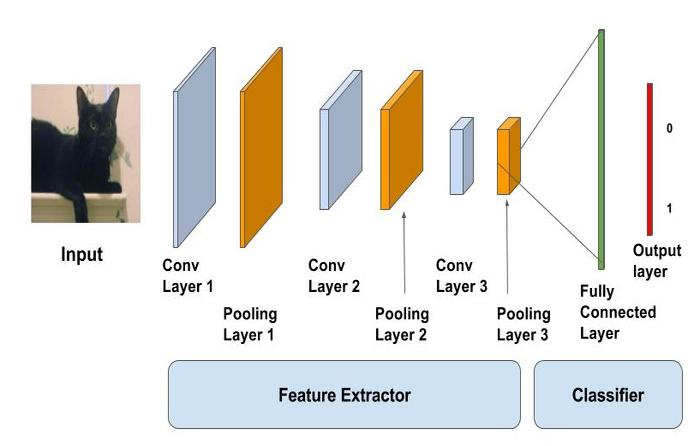

<a id=2.1.1></a>

### a. Input layer

As the name says, it’s our input image and can be Grayscale or RGB. Every image is made up of pixels that range from 0 to 255 (it can be normalized).

Below is the example of an input image of size 4*4 and has 3 channels i.e RGB and pixel values.
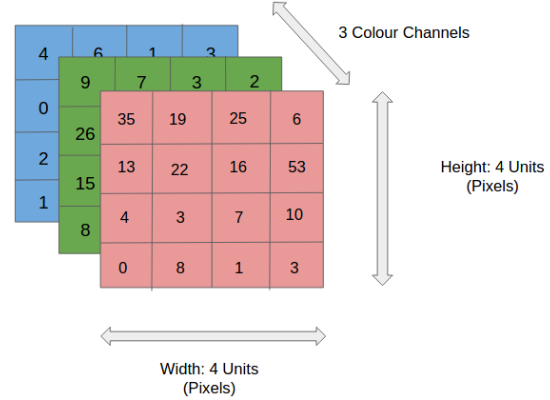

<a id=2.1.2></a>

### b. Convolution Layer

The convolution layer is the layer where the **filter is applied to our input image** to extract or detect its features. A filter is applied to the image multiple times and creates a feature map which helps in classifying the input image.

Let’s understand this with the help of an example. For simplicity, we will take a 2D input image with normalized pixels.
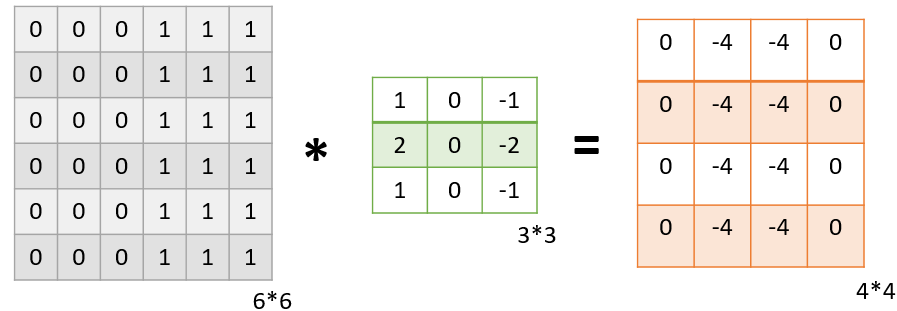

**The result of applying the filter to the image is that we get a Feature Map of 4*4** which has some information about the input image. Many such feature maps are generated in practical applications.

but what are the maths behind??

The filter passes over the entire image and we get our final Feature Map. Once we get the feature map, an activation function is applied to it for introducing nonlinearity.

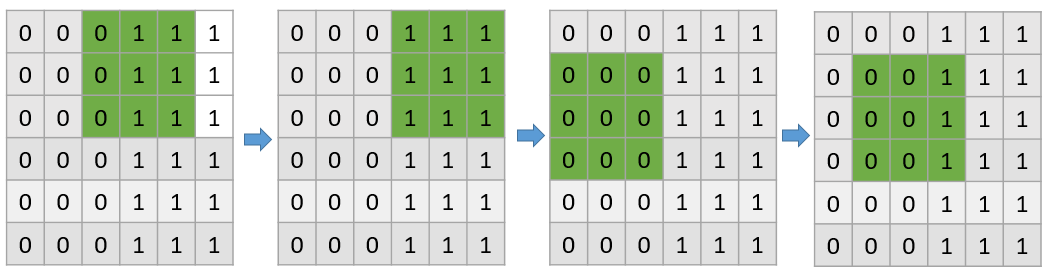

A point to note here is that the **Feature map we get is smaller** than the size of our image. As we increase the **value of stride** the size of the feature map decreases.

<a id=2.1.3></a>

### c. Pooling Layer

The pooling layer is applied after the Convolutional layer and is used to **reduce the dimensions of the feature map** which helps in preserving the important information or features of the input image and **reduces the computation time**.

The most common types of Pooling are Max Pooling and Average Pooling. The below figure shows how Max Pooling works. Using the Feature map which we got from the above example to apply Pooling. Here we are using a **Pooling layer of size 2*2 with a stride of 2.**

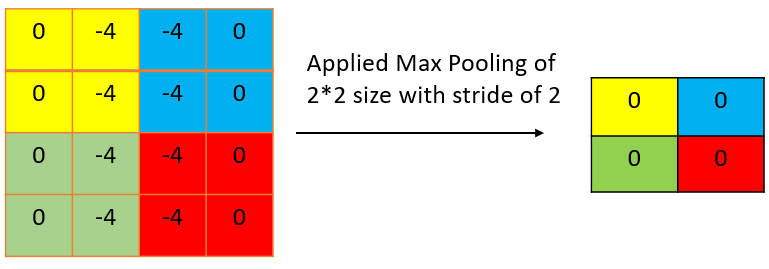

<a id=2.1.4></a>

### d. Fully Connected Layer

Till now we have performed the Feature Extraction steps, now comes the Classification part. The Fully connected layer (as we have in ANN) is used for **classifying the input image into a label**. This layer connects the information extracted from the previous steps (i.e Convolution layer and Pooling layers) to the output layer and eventually classifies the input into the desired label.

The complete process of a CNN model can be seen in the below image.
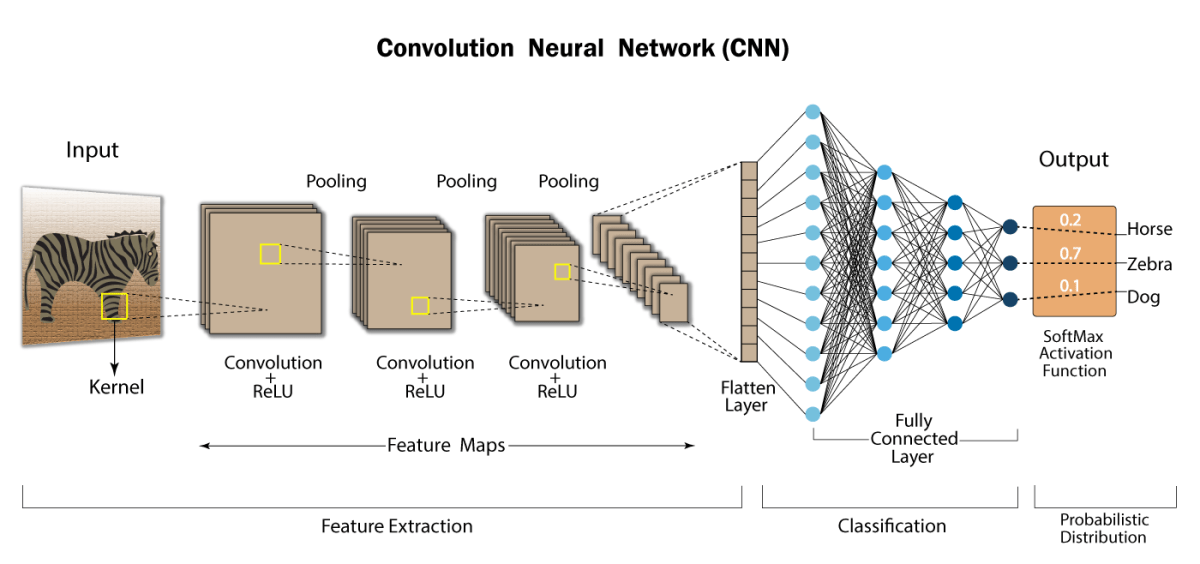

<a id=2.2></a>

## CNN Hands-On (using tensorflow)

In [18]:
#importing the required libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [19]:
#loading data
(X_train,y_train) , (X_test,y_test)=mnist.load_data()
#reshaping data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1)) 
#checking the shape after reshaping
print(X_train.shape)
print(X_test.shape)
#normalizing the pixel values
X_train=X_train/255
X_test=X_test/255

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [20]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1671 - accuracy: 0.9500
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0553 - accuracy: 0.9829
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0350 - accuracy: 0.9892
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0250 - accuracy: 0.9921
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0181 - accuracy: 0.9942
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0110 - accuracy: 0.9964
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0089 - accuracy: 0.9973
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0074 - accuracy: 0.9974
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0063 - accuracy: 0.9979
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [21]:
#evaluting the model
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0639 - accuracy: 0.9859


[0.06389398127794266, 0.9858999848365784]

**Pytorch Tutorial:**

https://github.com/farshadsangari/pytorch_tutorial

<a id=3></a>

<hr>
<hr>
<hr>

# 3. Decision Tree

Decision Tree is one of the easiest and popular classification algorithms to understand and interpret. It can be utilized for both classification and regression kind of problem.

<a id=3.1></a>

### Introduction

A decision tree is a flowchart-like tree structure where:

* Internal node: feature(or attribute)

* The branch: a decision rule

* Each leaf node: the outcome

This flowchart-like structure helps you in decision making.

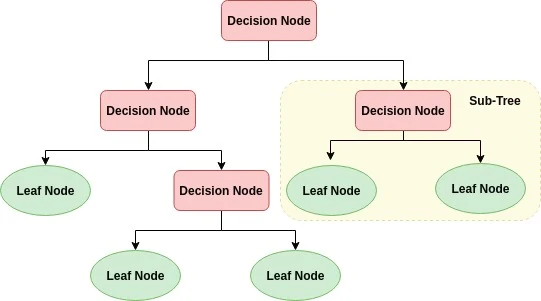

* Decision Tree is a **white box** type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network.

* Its **training time is faster** compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data.

* The decision tree is a **distribution-free or non-parametric method**, which does not depend upon probability distribution assumptions.

* Decision trees can **handle high dimensional data** with **good accuracy**.

<a id=3.2></a>

### How does the Decision Tree algorithm work?

The basic idea behind any decision tree algorithm is as follows:

1- Select the best attribute using Attribute Selection Measures(ASM) to split the records.

2- Make that attribute a decision node and breaks the dataset into smaller subsets.

3- Starts tree building by repeating this process recursively for each child until one of the condition will match:

   * All the tuples belong to the same attribute value.
   * There are no more remaining attributes.
   * There are no more instances.
   
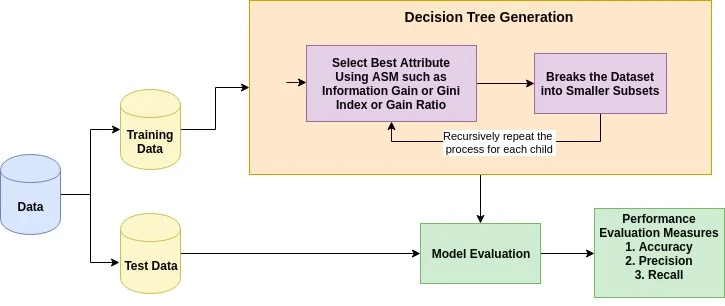

<a id=3.3></a>

### Attribute Selection Measures

Attribute selection measure is a heuristic for selecting the splitting criterion that partition data into the best possible manner. ASM provides a rank to each feature(or attribute) by explaining the given dataset. Best score attribute will be selected as a splitting attribute. In the case of a continuous-valued attribute, split points for branches also need to define. Most popular selection measures are **Information Gain, Gain Ratio, and Gini Index**.

<a id=3.3.1></a>

#### a. Information Gain

Shannon invented the concept of entropy, which measures the impurity of the input set. In information theory, it refers to the impurity in a group of examples. Information gain is the decrease in entropy.

Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values. **ID3** (Iterative Dichotomiser) decision tree algorithm uses information gain.

Info(D) is the average amount of information needed to identify the class label of a tuple in D:

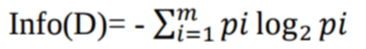

Where, pi is the probability that an arbitrary tuple in D belongs to class Ci.

$info_{A}(D)$ is the expected information required to classify a tuple from D based on the partitioning by A:

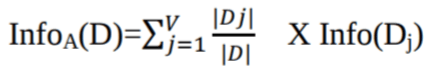

where |Dj|/|D| acts as the weight of the j-th partition.

The attribute A with the highest information gain, Gain(A), is chosen as the splitting attribute at node N():

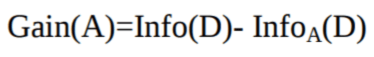

<a id=3.3.2></a>

#### b. Gain Ratio

Information gain is biased for the attribute with many outcomes. It means it prefers the attribute with a large number of distinct values. For instance, consider an attribute with a unique identifier such as customer_ID has zero info(D) because of pure partition. This maximizes the information gain and creates useless partitioning.

**C4.5**, an improvement of ID3, uses an extension to information gain known as the gain ratio. Gain ratio handles the issue of bias by normalizing the information gain using Split Info.

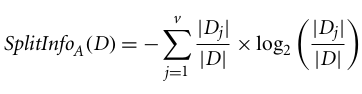

Where,
* |Dj|/|D| acts as the weight of the j-th partition.

* v is the number of discrete values in attribute A.

The gain ratio can be defined as

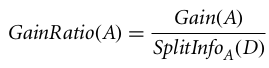

The attribute with the highest gain ratio is chosen as the splitting attribute

<a id=3.3.3></a>

#### c. Gini index

Another decision tree algorithm **CART** (Classification And Regression Tree) uses the Gini method to create split points.

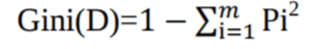

Where, pi is the probability that a tuple in D belongs to class Ci.

The Gini Index considers a **binary split** for each attribute. You can compute a **weighted sum of the impurity of each partition**. If a binary split on attribute A partitions data D into D1 and D2, the Gini index of D is:

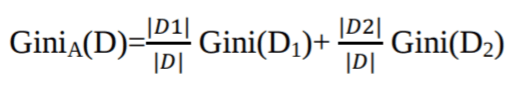

In case of a **discrete-valued attribute**, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute. 

In the case of **continuous-valued attributes**, the strategy is to select each pair of adjacent values as a possible split-point and point with smaller gini index chosen as the splitting point.

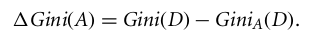

The attribute with minimum Gini index is chosen as the splitting attribute.

<a id=3.4></a>

### Decision Tree Classifier Hands-On

In [42]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [43]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [44]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label 

In [45]:
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [46]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.696969696969697


You can improve this accuracy by tuning the parameters in the Decision Tree Algorithm.

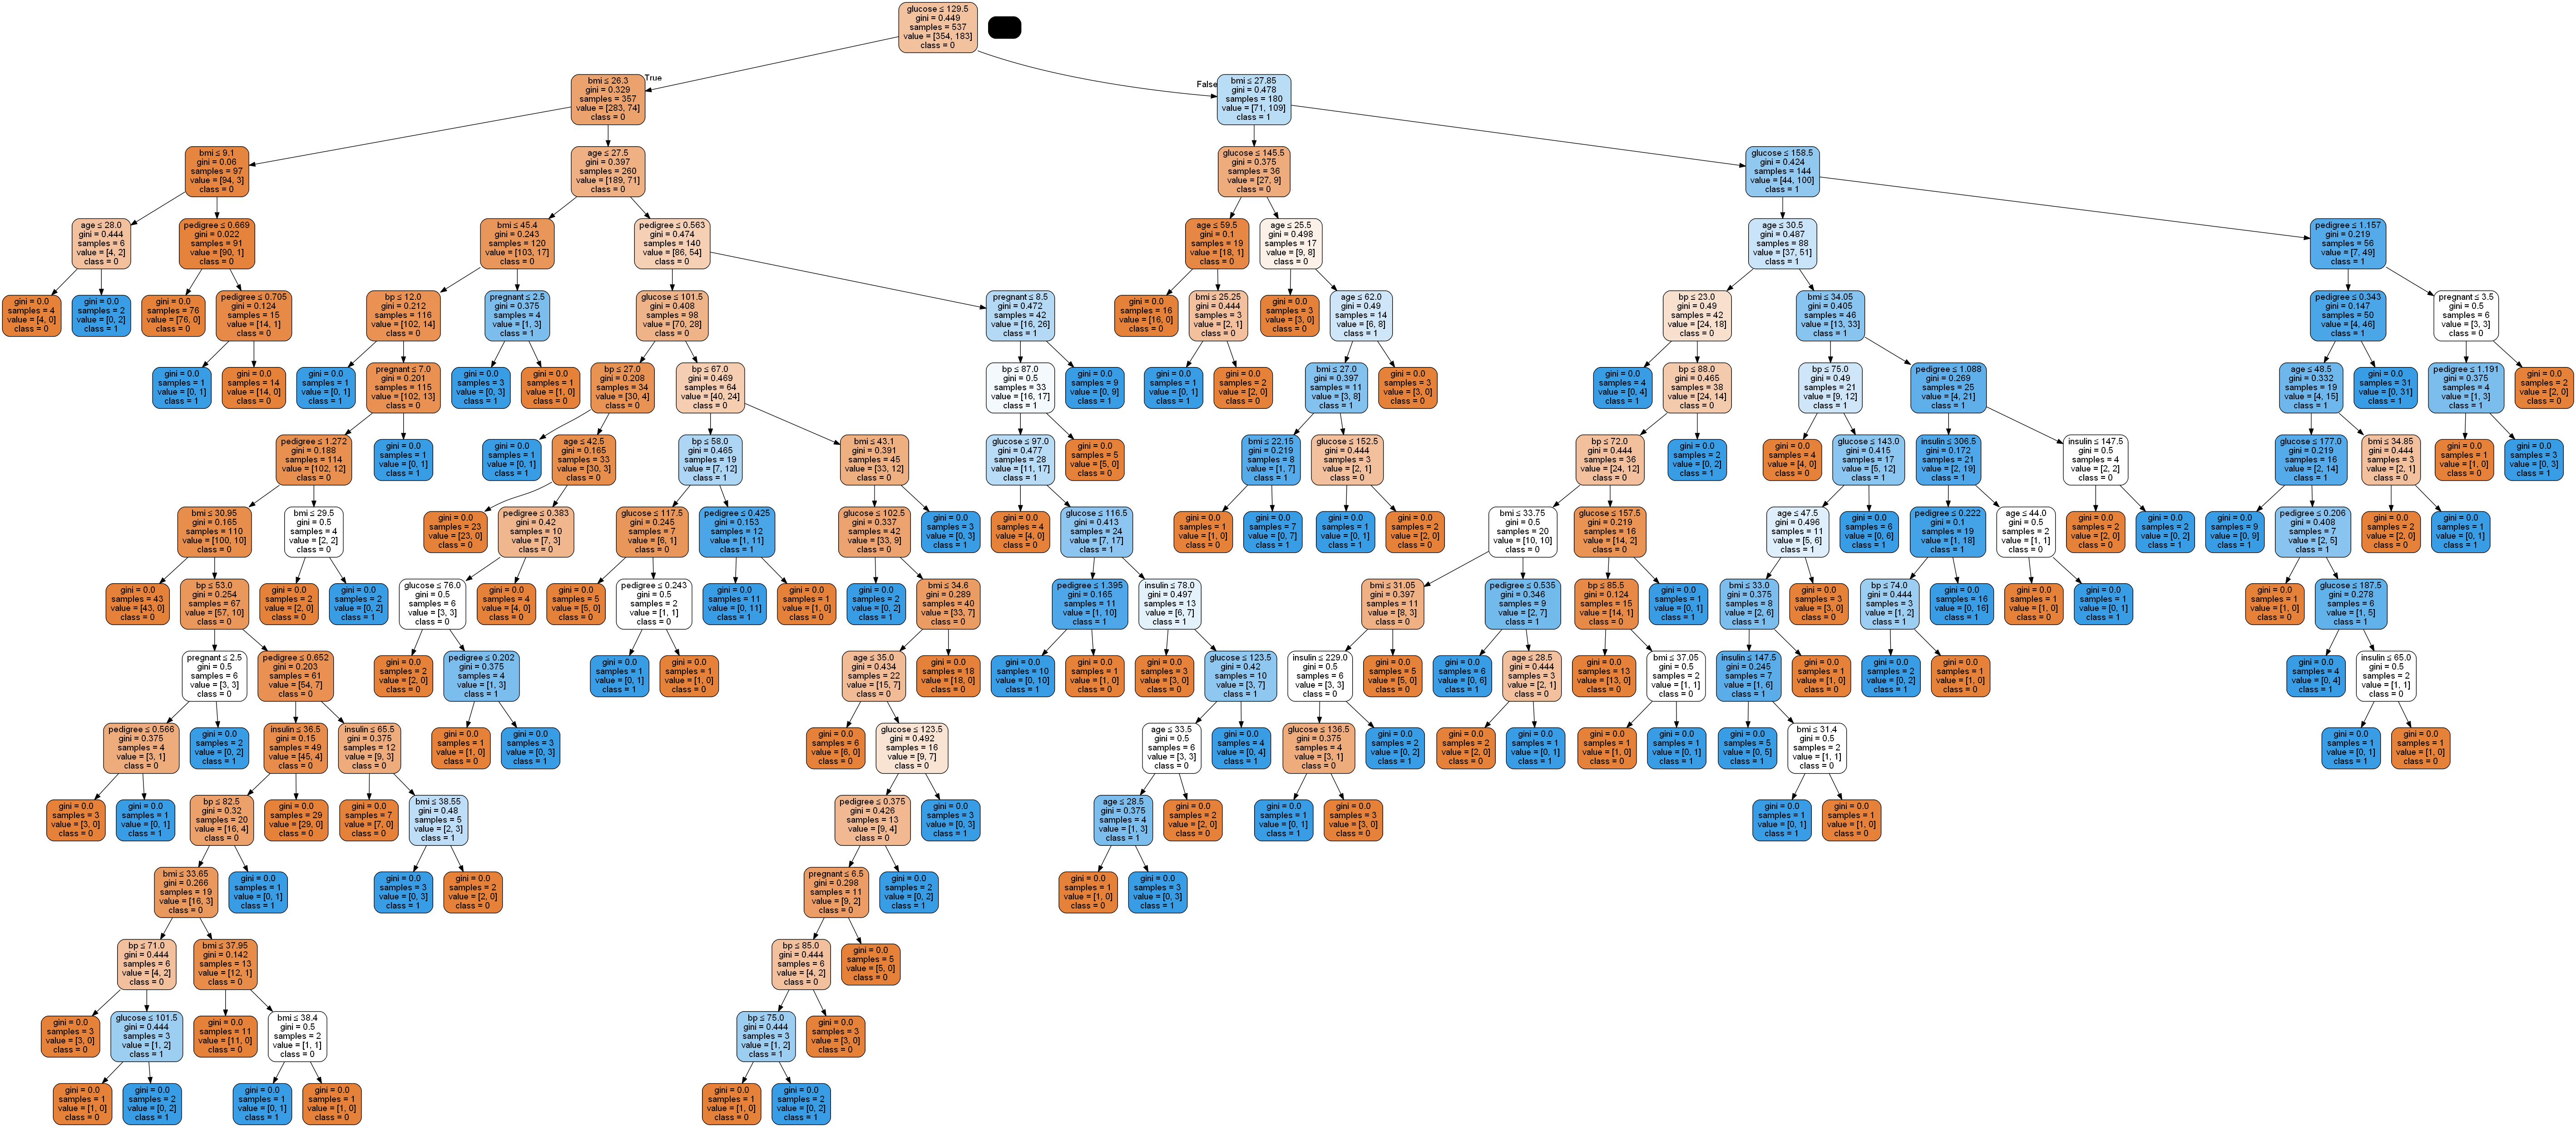

In [48]:
# Visualizing Decision Trees

from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.

In [49]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


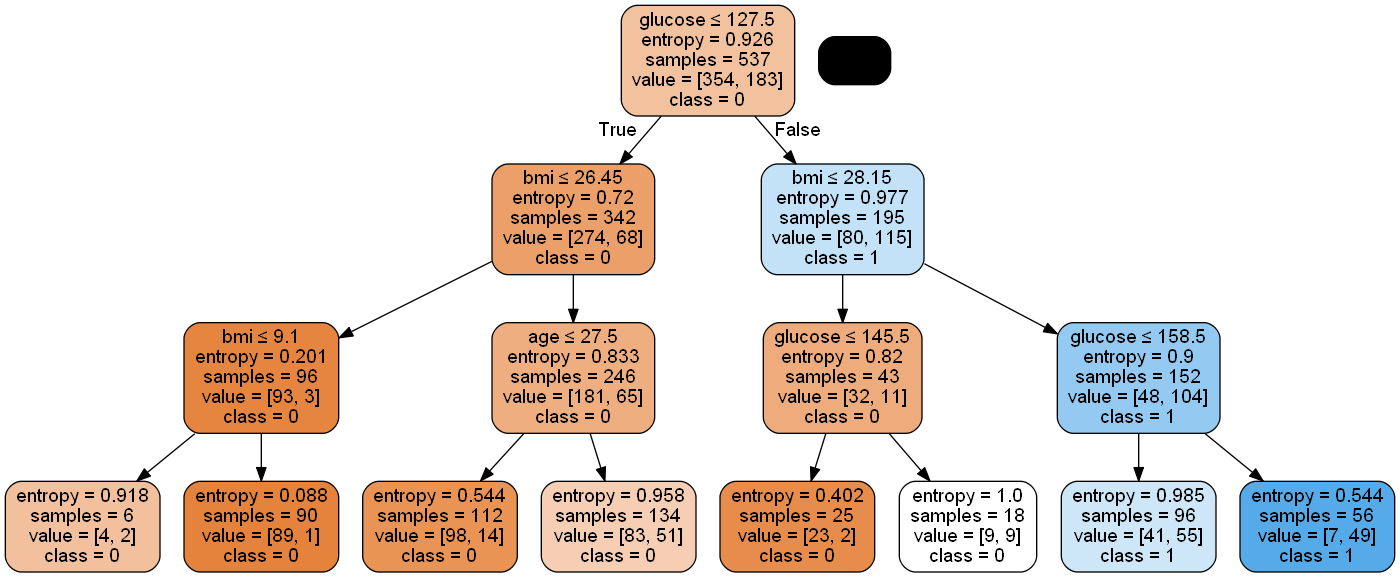

In [50]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

This pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot.

<a id=3.5></a>

### Pros & Cons

**Pros:**
- Decision trees are easy to interpret and visualize.
- It can easily capture Non-linear patterns.
- It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
- It can be used for feature engineering such as predicting missing values, suitable for variable selection.
- The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm.

**Cons:**
- Sensitive to noisy data. It can overfit noisy data.
- The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging - and boosting algorithms.
- Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.


# Good Luck :)